# Implementing the k-means clustering algorithm from scratch

The K-means clustering algorithm will be implemented as follows:
1. Select k random points as the centroids of the new clusters.
2. Loop the following procedure:
    * Assign each point to the centroid that is the minimum Euclidean distance away from the point.
    * Calculate the centroid of the new cluster $\displaystyle \vec{C}_n = \frac{1}{N}\sum \vec{p}_n$, where $N$ is the number of points in the cluster.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

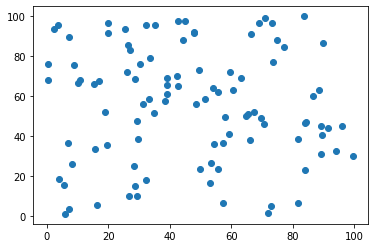

In [10]:
data = np.random.rand(100,2) * 100
plt.scatter(data[:,0], data[:,1])

In [40]:
def min_centroid(pt, centroids):
    return np.argmin([np.linalg.norm(pt-ct) for ct in centroids])

def update_centroids(data, centroids):
    assign = [min_centroid(p, centroids) for p in data]
    
    N = np.array([0 for _ in range(centroids.shape[0])])
    vec_sum = np.array([np.zeros(data.shape[1]) for _ in range(centroids.shape[0])])
    for pt in range(data.shape[0]):
        N[assign[pt]] += 1
        vec_sum[assign[pt]] += data[pt]
    centroids = np.array([vec/n for vec, n in zip(vec_sum, N)])
    return centroids, assign

def k_means(data, k):
    centroids = np.array([data[i] for i in np.random.choice(data.shape[0], k, False)])
    for i in range(1000):
        centroids, assign = update_centroids(data, centroids)
    return assign

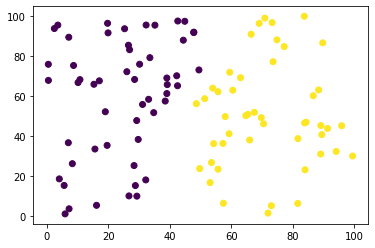

In [43]:
category = k_means(data, 2)
plt.scatter(data[:,0], data[:,1], c=category)